# The Battle of neighborhoods 
#  *Clusters in the world cuisine* 


## Introduction/Business Problem


Before the COVID-19 pandemic, tourism was a booming sector across the globe. Also, after the pandemic, it is expected to recover. Because people are curious about seeing places, doing new things, experiencing different cultures, and finally, trying out different local cuisines. 

The search of new tastes drives people to tourism and the touristic sector, for example the marketing department of a tourism agency can think of mapping out the similarities/differences between the different local cuisines in the world. Which cuisine is truly unique? Which countries have similar cuisines? The answers to these questions can form the basis of a marketing argument and is already interesting on its own. 

Therefore, the primary target audience of this project are the companies and government agencies with an interest of having a great restart of the touristic sector after the pandemic. In the second place, the project also targets the attention of people seeking to try new cuisines, as a help to guide them towards a destination with tastes they have not tasted before.





## Data 


To tackle the above mentioned problem, I will use the following data.




**Data of recipes**

A researcher named Yong-Yeol Ahn scraped tens of thousands of food recipes (cuisines and ingredients) from three different websites. For more information on Yong-Yeol Ahn and his research, I refer to [Flavor Network and the Principles of Food Pairing](http://yongyeol.com/papers/ahn-flavornet-2011.pdf).
I will be using the version of the data [hosted on the IBM server](https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/data/recipes.csv). 
It is a dataset of 57,691 recipes, with data on the cuisine, as well as whether 384 ingredients exist in the recipe or not.


**Foursquare API**

Foursquare API will be for two purposed,
geocoding the coordinates of 

*   Obtaining the coordinates of the said cuisine, and
*   Exploring the restaurants in the location of interest






## Data preparation




*Get* the version of Python installed.


In [2]:
# check Python version
!python -V

Python 3.6.9


**Download** the library and dependencies that we will need to run this lab.


In [3]:
import pandas as pd # import library to read data into dataframe
pd.set_option('display.max_columns', None)
import numpy as np # import numpy library
import re # import library for regular expression

Download the data from the IBM server and read it into a _pandas_ dataframe.


In [4]:
recipes = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/data/recipes.csv")

print("Data read into dataframe!") # takes about 30 seconds

Data read into dataframe!


Show the first few rows.


In [5]:
recipes.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,

Get the dimensions of the dataframe.


In [6]:
recipes.shape

(57691, 384)

So our dataset consists of 57,691 recipes. Each row represents a recipe, and for each recipe, the corresponding cuisine is documented as well as whether 384 ingredients exist in the recipe or not, beginning with almond and ending with zucchini.


We know that a basic sushi recipe includes the ingredients:

-   rice
-   soy sauce
-   wasabi
-   some fish/vegetables


Let's check that these ingredients exist in our dataframe:


In [7]:
ingredients = list(recipes.columns.values)

print([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(rice).*")).search(ingredient)] if match])
print([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(wasabi).*")).search(ingredient)] if match])
print([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(soy).*")).search(ingredient)] if match])

['brown_rice', 'licorice', 'rice']
['wasabi']
['soy_sauce', 'soybean', 'soybean_oil']


Yes, they do!

-   rice exists as rice.
-   wasabi exists as wasabi.
-   soy exists as soy_sauce.

So maybe if a recipe contains all three ingredients: rice, wasabi, and soy_sauce, then we can confidently say that the recipe is a **Japanese** cuisine! Let's keep this in mind!

* * *


Fix the name of the column showing the cuisine.


By looking at the above table, we can make the following observations:

1.  Cuisine column is labeled not always as Country.
2.  Cuisine names are not consistent as not all of them start with an uppercase first letter.
3.  Some cuisines are duplicated as variation of the country name, such as Vietnam and Vietnamese.


In [8]:
column_names = recipes.columns.values
column_names[0] = "cuisine"
recipes.columns = column_names

recipes

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,

Now, look at the data to see if it needs cleaning.


In [9]:
pd.set_option('display.max_row', 69)
recipes["cuisine"].value_counts() # frequency table



American                   40150
Mexico                      1754
Italian                     1715
Italy                       1461
Asian                       1176
French                       996
east_asian                   951
Canada                       774
korean                       767
Mexican                      622
western                      450
Southern_SoulFood            346
India                        324
Jewish                       320
Spanish_Portuguese           291
Mediterranean                289
UK-and-Ireland               282
Indian                       274
France                       268
MiddleEastern                248
Central_SouthAmerican        241
Germany                      237
Eastern-Europe               235
Chinese                      226
Greek                        225
English_Scottish             204
Caribbean                    183
Thai                         164
Scandinavia                  158
EasternEuropean_Russian      146
Cajun_Creo

Make the cuisine names consistent.


In [10]:
recipes.loc[recipes["cuisine"] == "American", "cuisine"] = "United States"
recipes.loc[recipes["cuisine"] == "Jewish", "cuisine"] = "Israel"
recipes.loc[recipes["cuisine"] == "East-African", "cuisine"] = "Tanzania"
recipes.loc[recipes["cuisine"] == "Asian", "cuisine"] = "Hong Kong"
recipes.loc[recipes["cuisine"] == "French", "cuisine"] = "France"
recipes.loc[recipes["cuisine"] == "korean", "cuisine"] = "South-Korea"
recipes.loc[recipes["cuisine"] == "Mexican", "cuisine"] = "Mexico"
recipes.loc[recipes["cuisine"] == "western", "cuisine"] = "France"
recipes.loc[recipes["cuisine"] == "Southern_SoulFood", "cuisine"] = "Texas"
recipes.loc[recipes["cuisine"] == "Spanish_Portuguese", "cuisine"] = "Spain"
recipes.loc[recipes["cuisine"] == "Mediterranean", "cuisine"] = "Lebanon"
recipes.loc[recipes["cuisine"] == "UK-and-Ireland", "cuisine"] = "United Kingdom"
recipes.loc[recipes["cuisine"] == "Indian", "cuisine"] = "India"
recipes.loc[recipes["cuisine"] == "Central_SouthAmerican", "cuisine"] = "Venezuela"
recipes.loc[recipes["cuisine"] == "MiddleEastern", "cuisine"] = "Iraq"
recipes.loc[recipes["cuisine"] == "Eastern-Europe", "cuisine"] = "Poland"
recipes.loc[recipes["cuisine"] == "Chinese", "cuisine"] = "China"
recipes.loc[recipes["cuisine"] == "Greek", "cuisine"] = "Greece"
recipes.loc[recipes["cuisine"] == "English_Scottish", "cuisine"] = "Scotland"
recipes.loc[recipes["cuisine"] == "Caribbean", "cuisine"] = "Cuba"
recipes.loc[recipes["cuisine"] == "Thai", "cuisine"] = "Thailand"
recipes.loc[recipes["cuisine"] == "Scandinavia", "cuisine"] = "Sweden"
recipes.loc[recipes["cuisine"] == "EasternEuropean_Russian", "cuisine"] = "Russia"
recipes.loc[recipes["cuisine"] == "Cajun_Creole", "cuisine"] = "New Orleans"
recipes.loc[recipes["cuisine"] == "Moroccan", "cuisine"] = "Morocco"
recipes.loc[recipes["cuisine"] == "Japanese", "cuisine"] = "Japan"
recipes.loc[recipes["cuisine"] == "African", "cuisine"] = "Congo"
recipes.loc[recipes["cuisine"] == "South-America", "cuisine"] = "Argentina"
recipes.loc[recipes["cuisine"] == "japanese", "cuisine"] = "Japan"
recipes.loc[recipes["cuisine"] == "Scandinavian", "cuisine"] = "Finland"
recipes.loc[recipes["cuisine"] == "chinese", "cuisine"] = "China"
recipes.loc[recipes["cuisine"] == "Irish", "cuisine"] = "Republic of Ireland"
recipes.loc[recipes["cuisine"] == "italian", "cuisine"] = "Italy"
recipes.loc[recipes["cuisine"] == "Italian", "cuisine"] = "Italy"
recipes.loc[recipes["cuisine"] == "Vietnamese", "cuisine"] = "Vietnam"
recipes.loc[recipes["cuisine"] == "North-African", "cuisine"] = "Algeria"
recipes.loc[recipes["cuisine"] == "German", "cuisine"] = "Germany"
recipes.loc[recipes["cuisine"] == "asian", "cuisine"] = "Zhongshan"
recipes.loc[recipes["cuisine"] == "South-African", "cuisine"] = "South-Africa"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "Mexico"
recipes.loc[recipes["cuisine"] == "West-African", "cuisine"] = "Cameroon"
recipes.loc[recipes["cuisine"] == "East-African", "cuisine"] = "Ethiopia"
recipes.loc[recipes["cuisine"] == "east_asian", "cuisine"] = "Mongolia"

Let's keep the code below for future improvements:  cuisines with a low amount of recipes might give rise to wrong results.

In [11]:
# get list of cuisines to keep
recipes_counts = recipes["cuisine"].value_counts()
cuisines_indices = recipes_counts > 1

cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])

In [12]:
rows_before = recipes.shape[0] # number of rows of original dataframe
print("Number of rows of original dataframe is {}.".format(rows_before))

recipes = recipes.loc[recipes['cuisine'].isin(cuisines_to_keep)]

rows_after = recipes.shape[0] # number of rows of processed dataframe
print("Number of rows of processed dataframe is {}.".format(rows_after))

print("{} rows removed!".format(rows_before - rows_after))

Number of rows of original dataframe is 57691.
Number of rows of processed dataframe is 57691.
0 rows removed!


Convert all Yes's to 1's and the No's to 0's


In [13]:
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

#### Let's analyze the data a little more in order to learn the data better and note any interesting preliminary observations.


Run the following cell to get the recipes that contain **rice** _and_ **soy** _and_ **wasabi** _and_ **seaweed**.


In [14]:
recipes.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

In [15]:
check_recipes = recipes.loc[
    (recipes["rice"] == 1) &
    (recipes["soy_sauce"] == 1) &
    (recipes["wasabi"] == 1) &
    (recipes["seaweed"] == 1)
]

check_recipes

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
11306,Japan,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Let's count the ingredients across all recipes.


In [16]:
# sum each column
ing = recipes.iloc[:, 1:].sum(axis=0)

In [17]:
# define each column as a pandas series
ingredient = pd.Series(ing.index.values, index = np.arange(len(ing)))
count = pd.Series(list(ing), index = np.arange(len(ing)))

# create the dataframe
ing_df = pd.DataFrame(dict(ingredient = ingredient, count = count))
ing_df = ing_df[["ingredient", "count"]]
print(ing_df.to_string())

                  ingredient  count
0                     almond   2329
1                   angelica      1
2                      anise    224
3                 anise_seed     87
4                      apple   2433
5               apple_brandy     37
6                    apricot    626
7                   armagnac     11
8                  artemisia     13
9                  artichoke    391
10                 asparagus    461
11                   avocado    662
12                     bacon   2172
13              baked_potato      9
14                      balm      3
15                    banana    992
16                    barley    267
17             bartlett_pear     23
18                     basil   3845
19                       bay   1486
20                      bean   2003
21                     beech      1
22                      beef   4946
23                beef_broth    850
24                beef_liver     10
25                      beer    308
26                      beet

Now we have a dataframe of ingredients and their total counts across all recipes. Let's sort this dataframe in descending order.


In [18]:
ing_df.sort_values(["count"], ascending=False, inplace=True)
ing_df.reset_index(inplace=True, drop=True)

print(ing_df)

           ingredient  count
0                 egg  21114
1               wheat  20896
2              butter  20814
3               onion  18205
4              garlic  17465
..                ...    ...
378  lilac_flower_oil      1
379    strawberry_jam      1
380   sturgeon_caviar      1
381       kaffir_lime      1
382             beech      1

[383 rows x 2 columns]


Let's compute a more objective summary of the ingredients by looking at the ingredients per cuisine.


#### Let's create a _profile_ for each cuisine.

In other words, let's try to find out what ingredients Chinese people typically use, and what is **Canadian** food for example.


In [19]:

cuisines = recipes.groupby("cuisine").mean()
cuisines


,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
cuisine,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Algeria,0.116667,0.000000,

As shown above, we have just created a dataframe where each row is a cuisine and each column (except for the first column) is an ingredient, and the row values represent the percentage of each ingredient in the corresponding cuisine.

**For example**:

-   _almond_ is present across 15.65% of all of the **African** recipes.
-   _butter_ is present across 38.11% of all of the **Canadian** recipes.


Let's print out the profile for each cuisine by displaying the top four ingredients in each cuisine.


In [20]:
num_ingredients = 4 # define number of top ingredients to print

# define a function that prints the top ingredients for each cuisine
def print_top_ingredients(row):
    print(row.name.upper())
    row_sorted = row.sort_values(ascending=False)*100
    top_ingredients = list(row_sorted.index.values)[0:num_ingredients]
    row_sorted = list(row_sorted)[0:num_ingredients]

    for ind, ingredient in enumerate(top_ingredients):
        print("%s (%d%%)" % (ingredient, row_sorted[ind]), end=' ')
    print("\n")
    # apply function to cuisines dataframe
create_cuisines_profiles = cuisines.apply(print_top_ingredients, axis=1)

ALGERIA
onion (55%) olive_oil (50%) cumin (48%) garlic (46%) 

ARGENTINA
onion (42%) garlic (36%) egg (34%) milk (31%) 

AUSTRIA
egg (80%) wheat (80%) butter (71%) milk (47%) 

BANGLADESH
onion (100%) cayenne (100%) vegetable_oil (100%) turmeric (100%) 

BELGIUM
wheat (90%) butter (72%) cane_molasses (54%) egg (45%) 

CAMEROON
onion (84%) peanut_butter (61%) tomato (61%) cayenne (61%) 

CANADA
wheat (39%) butter (38%) egg (35%) onion (34%) 

CHINA
soy_sauce (68%) ginger (53%) garlic (52%) scallion (48%) 

CONGO
onion (53%) olive_oil (52%) garlic (49%) cumin (42%) 

CUBA
onion (51%) garlic (50%) vegetable_oil (31%) black_pepper (31%) 

FINLAND
butter (53%) egg (41%) vinegar (31%) cream (31%) 

FRANCE
butter (49%) egg (46%) wheat (39%) onion (26%) 

GERMANY
wheat (64%) egg (60%) butter (47%) onion (34%) 

GREECE
olive_oil (76%) garlic (44%) onion (36%) lemon_juice (33%) 

HONG KONG
soy_sauce (50%) ginger (48%) garlic (48%) rice (40%) 

INDIA
cumin (60%) turmeric (50%) onion (49%) coriand

## Clustering

Now, let's use the KNN clustering algorithm to cluster these 69 cuisines into several groups by the similarity in their ingredient profiles.

As the KNN algorithm requires to specify the number of clusters beforehand, we need first to answer this question. For this purpose, let's use the elbow method.

Text(0, 0.5, 'Error')

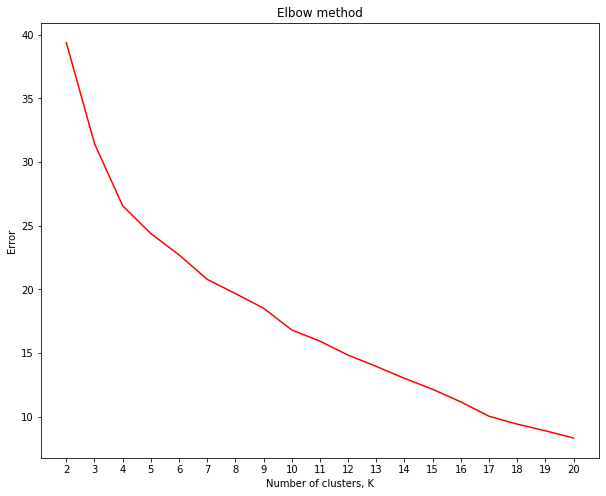

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
cuisines_clustering = cuisines
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, random_state=8)
    km.fit(cuisines_clustering)
    return km.inertia_

scores = [get_inertia(x) for x in range(2, 21)]

plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores, color='r')
plt.title("Elbow method")
plt.xticks(range(2, 21))
plt.xlabel("Number of clusters, K")
plt.ylabel("Error")

The high numbers on the vertical axis are expected, as we are comparing 384 ingredients. It seems that the elbow cannot be unambiguously defined visually. Still a good candidate is 7 for the following reasons,
 

*   While at 7 we don't have a clear elbow, the decrease for k>7 is less than linear.
*   The error seems reasonable (on its scale), and more importantly
*   We aim to have a relatable picture for tourists. It is conceptually nice to divide the world map in seven pieces, as there are for example also (usually) 7 continents. 




In [22]:
# apply function to cuisines dataframe
# import k-means from clustering stage


# set number of clusters
kclusters = 7

#cuisines_clustering = cuisines.drop('cuisine', 1)
cuisines_clustering = cuisines
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cuisines_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 



array([5, 4, 1, 3, 1, 4, 1, 2, 5, 4, 1, 1, 1, 6, 2, 0, 4, 0, 5, 1],
      dtype=int32)

In [23]:
cuisines.insert(0, 'Cluster Labels', kmeans.labels_)


cuisines.head() # check the last columns!

,Cluster Labels,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
cuisine,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Algeria,5,

In [24]:
cuisines

,Cluster Labels,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
cuisine,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Algeria,5,


Here we can already see that the clusters are somewhat expected, for example 2 seems to be a cluster of asian cuisines, while 1 seems to be a cluster of western cuisines. Now let's look present it on a world map.



In [25]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[0, 0], zoom_start=3)



In [26]:
#get coordinates of country...
from geopy.geocoders import Nominatim
CLIENT_ID = 'XXX' # your Foursquare ID
CLIENT_SECRET = 'XXX' # your Foursquare Secret
ACCESS_TOKEN = 'XXX' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30

Lets first convert the country names to geospatial coordinates.

In [27]:


lats = kmeans.labels_-kmeans.labels_*.08 #to convert it to floats
lons = kmeans.labels_-kmeans.labels_*.09
geolocator = Nominatim(user_agent="foursquare_agent")
i=0
for x in lats:
  location = geolocator.geocode(cuisines.index.values[i])
  print(location)
  lats[i] = location.latitude
  lons[i] = location.longitude
  i=i+1
  


#cuisines.head()
#cuisines.insert(0, 'Cluster Labels', kmeans.labels_)

Algérie / ⵍⵣⵣⴰⵢⴻⵔ / الجزائر
Argentina
Österreich
বাংলাদেশ
België / Belgique / Belgien
Cameroun
Canada
中国
Congo
Cuba
Suomi / Finland
France
Deutschland
Ελλάδα
香港島 Hong Kong Island, 香港 Hong Kong, 中国
India
Indonesia
ایران
العراق / عێراق / ܥܝܪܐܩ
ישראל
Italia
日本
대한민국
لبنان
Malaysia
México
Монгол улс ᠮᠤᠩᠭᠤᠯ ᠤᠯᠤᠰ
Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب
Nederland
New Orleans, Orleans Parish, Louisiana, United States
پاکستان
Philippines
Polska
Portugal
Éire / Ireland
Россия
Scotland, United Kingdom
South Africa
대한민국
The Southwestern, Dallas, TX, Dallas, Dallas County, Texas, United States
España
Sverige
Schweiz/Suisse/Svizzera/Svizra
Tanzania
Texas, United States
ประเทศไทย
Türkiye
United Kingdom
United States
Venezuela
Việt Nam
中山市, 广东省, 中国


In [28]:

cuisinesl = cuisines
cuisinesl.insert(0, 'latitude_exacte', lats)
cuisinesl.insert(0, 'longitude_exacte', lons)
#cuisinesl.drop(columns=['latitude', 'longitude'])
cuisinesl.head()

,longitude_exacte,latitude_exacte,Cluster Labels,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
cuisine,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [29]:
# set color scheme for the clusters
map_clusters = folium.Map(location=[0, 0], zoom_start=3)


x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
Dotcolor = ['red', 'blue','green', 'orange', 'magenta', 'cyan', 'black']
for lat, lng, clus, cuisname in zip(cuisinesl['latitude_exacte'], 
                                           cuisinesl['longitude_exacte'],
                                           cuisinesl['Cluster Labels'],
                                           cuisines.index.values):
    label_text = cuisname + ' belongs to cluster ' + str(clus) 
    label = folium.Popup(label_text)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color=Dotcolor[clus],
        fill_color=Dotcolor[clus],
        fill_opacity=0.8).add_to(map_clusters)  
map_clusters

Before discussing this interesting result, let's also count the amount of countries with each label.

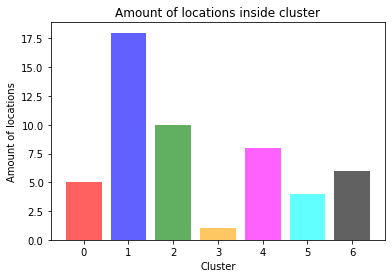

In [30]:
objects = (0,1,2,3,4,5,6)
ita = cuisines
y_pos = np.arange(len(objects))
performance = ita['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.62, color=['red', 'blue','green', 'orange', 'magenta', 'cyan', 'black'])
plt.xticks(y_pos, objects)
plt.ylabel('Amount of locations')
plt.xlabel('Cluster')
plt.title('Amount of locations inside cluster')

plt.show()

In [31]:
ita['Cluster Labels'].value_counts()

1    18
2    10
4     8
6     6
0     5
5     4
3     1
Name: Cluster Labels, dtype: int64

## Bangladeshi restaurants in Tokyo

Now that we know that Bangladeshi cuisine is the unique one, let us leverage Foursquare see whether there are Bangladeshi restaurants in Tokyo, and whether they can be clustered as well. 

In [265]:
import requests

request_parameters = {
    "client_id": CLIENT_ID,
    "client_secret": CLIENT_SECRET,
    "v": '20180605',
   # "section": "coffee",
    "categoryId" : "5e179ee74ae8e90006e9a746", #Bangladeshi restaurant category
    "near": "Tokyo",
    "radius": 3000,
    "limit": 50}

data = requests.get("https://api.foursquare.com/v2/venues/explore", params=request_parameters)

In [266]:
d = data.json()["response"]
d.keys()

dict_keys(['suggestedFilters', 'geocode', 'headerLocation', 'headerFullLocation', 'headerLocationGranularity', 'query', 'totalResults', 'suggestedBounds', 'groups'])

Let us look a bit at the structure of this data.

In [267]:
d["geocode"]

{'cc': 'JP',
 'center': {'lat': 35.6895, 'lng': 139.69171},
 'displayString': 'Tokyo, Tōkyō, Japan',
 'geometry': {'bounds': {'ne': {'lat': 35.898700999201466,
    'lng': 139.91899196935927},
   'sw': {'lat': 35.501102112000744, 'lng': 138.9427000242654}}},
 'longId': '72057594039778083',
 'slug': 'tokyo',
 'what': '',
 'where': 'tokyo'}

In [268]:
items = d["groups"][0]["items"]
print("number of items: %i" % len(items))
items[0]

number of items: 8


{'reasons': {'count': 0,
  'items': [{'reasonName': 'globalInteractionReason',
    'summary': 'This spot is popular',
    'type': 'general'}]},
 'referralId': 'e-0-5cf1ede0fb8e59002c76df37-0',
 'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
     'suffix': '.png'},
    'id': '5e179ee74ae8e90006e9a746',
    'name': 'Bangladeshi Restaurant',
    'pluralName': 'Bangladeshi Restaurants',
    'primary': True,
    'shortName': 'Bangladeshi'}],
  'id': '5cf1ede0fb8e59002c76df37',
  'location': {'address': '高円寺北3-22-8',
   'cc': 'JP',
   'city': '杉並区',
   'country': '日本',
   'formattedAddress': ['高円寺北3-22-8', '杉並区, 東京都', '166-0002', '日本'],
   'labeledLatLngs': [{'label': 'display',
     'lat': 35.706069,
     'lng': 139.649168}],
   'lat': 35.706069,
   'lng': 139.649168,
   'postalCode': '166-0002',
   'state': '東京都'},
  'name': 'トルカリ高円寺',
  'photos': {'count': 0, 'groups': []}}}

Unfortunately there are only 8 of them. Instead of running the KNN algorithm, we will visually inspect whether they form clusters on a map. Now we can correct the adress information and put the data in a pandas frame to visualize in the next step.

In [269]:
df_raw = []
for item in items:
    venue = item["venue"]
    categories, uid, name, location = venue["categories"], venue["id"], venue["name"], venue["location"]
    print(location)
    assert len(categories) == 1
    shortname = categories[0]["shortName"]
    address =  ''
    if hasattr(location, 'address'):
      address = location['address']
    if not "postalCode" in location:
        continue
    postalcode = location["postalCode"]
    lat = location["lat"]
    lng = location["lng"]
    datarow = (uid, name, shortname, address, postalcode, lat, lng)
    df_raw.append(datarow)
df = pd.DataFrame(df_raw, columns=["uid", "name", "shortname", "address", "postalcode", "lat", "lng"])
print("found %i Bangladeshi places" % len(df))
df.head()

{'address': '高円寺北3-22-8', 'lat': 35.706069, 'lng': 139.649168, 'labeledLatLngs': [{'label': 'display', 'lat': 35.706069, 'lng': 139.649168}], 'postalCode': '166-0002', 'cc': 'JP', 'city': '杉並区', 'state': '東京都', 'country': '日本', 'formattedAddress': ['高円寺北3-22-8', '杉並区, 東京都', '166-0002', '日本']}
{'address': '江東橋3-9-24', 'crossStreet': 'ニュー錦糸町ビル 1F', 'lat': 35.69454997247728, 'lng': 139.81373101472855, 'labeledLatLngs': [{'label': 'display', 'lat': 35.69454997247728, 'lng': 139.81373101472855}], 'cc': 'JP', 'city': '東京', 'state': '東京都', 'country': '日本', 'formattedAddress': ['江東橋3-9-24 (ニュー錦糸町ビル 1F)', '墨田区, 東京都', '日本']}
{'address': '東池袋2-4-7', 'lat': 35.730768, 'lng': 139.72527, 'labeledLatLngs': [{'label': 'display', 'lat': 35.730768, 'lng': 139.72527}], 'postalCode': '170-0013', 'cc': 'JP', 'city': '東京', 'state': '東京都', 'country': '日本', 'formattedAddress': ['東池袋2-4-7', '豊島区, 東京都', '170-0013', '日本']}
{'address': '町屋3-2-1', 'crossStreet': 'ライオンズプラザ B1F', 'lat': 35.74597834636443, 'lng': 139

,uid,name,shortname,address,postalcode,lat,lng
0,5cf1ede0fb8e59002c76df37,トルカリ高円寺,Bangladeshi,,166-0002,35.706069,139.649168
1,5c964a3556c89f003992b3c7,Sunali (スナリ 東池袋店),Bangladeshi,,170-0013,35.730768,139.725270
2,4c1307a782a3c9b6f0eafaf8,Puja (プージャー),Bangladeshi,,116-0001,35.745978,139.782371
3,5ae80106ad910e002c5df355,Bengal Curry Factory,Bangladeshi,,101-0047,35.690829,139.769871
4,4d9f2cab925f236a471f4944,ミルチ,Bangladeshi,,167-0053,35.703513,139.599681


In [273]:
from folium import plugins


MapTok = folium.Map(location=[35.6895, 139.69171], zoom_start=12)

def add_markers(df):
    for (j, row) in df.iterrows():
        label = folium.Popup(row["name"], parse_html=True)
        folium.CircleMarker(
            [row["lat"], row["lng"]],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.8,
            parse_html=False).add_to(MapTok)

add_markers(df)
hm_data = df[["lat", "lng"]].to_numpy().tolist()
MapTok.add_child(plugins.HeatMap(hm_data))

MapTok

# Discussion

For the clustering, can see that the world map of cuisines can be consistently grouped by similarity into seven clusters. Even though the geographical proximity was not fed into the algorithm, the result that came out clearly showed that the cuisines are mostly geographically grouped. As regions which emerge out of this grouping are huge, even continent-sized, this fact cannot be explained by mere similarities in natural geography and vegetation, but rather by a combination of it with cultural influences (which in its turn is also largely influenced by geography).

The following clusters appeared:



0.   The **Indian Ocean cuisine** consists of India, Pakistan, Iran but also Malaysia and Tanzania. While the grouping of the first three countries is expected, the latter two country also use similar ingredients, which I wasn't really expecting.
1.   The **Western cuisine** is the largest group, probably because the website at the origin of the dataset made the finest distinction between western countries. They mostly form a geographical cluster, while the exceptions are expected. These exceptions are South-Africa and Israel, which have been receiving an important amount of settlers from Western countries. 
2.   The **(East-) Asian cuisine** is strictly geographically coherent.  It consists of the cuisines of Japan, China, Korea. But also countries like Vietnam and the Philipines share the main ingredients. 
3.   The **Bangladeshi cuisine** is a unique one. This cuisine ended up as its own cluster. Even when k was selected to be 6, this cuisine was still a cluster on its own. Geogrpahically, it is at the border of two clusters, namely the Indian Oceaon cuisine and the East-Asian cuisine. Therefore it is most likely influenced by both.
4.   The **Latin cuisine** is the grouping of the cuisines mainly of Latin-American countries, but surprisingly it seems that Indonesia and Eastern Africa also share many ingredients. While this grouping could be coincidental, it is interesting to note that geographically, we can collect them all in a close curve which doesn't intersect any other cuisines. 

5.   The **Arabic cuisine** groups Northern Africa and Iraq. The dot placed on Congo in fact correspond to recipes labled as 'African', and is the dot with the least accurate placing. So take that dot with a grain of salt.

5.   The **Mediterranean cuisine** shows the culinary binding effect of the Mediterranean sea. The countries around this sea, from Spain, to Italy, to Turkey, mostly eat very similar ingredients. This is a group which is geogrpahically coherent and the only country in it which has no Mediterranean coast, is Portugal. 


# Conclusion and outlook

In this work, we have used the technique of KNN to cluster cuisines based on the similarity of the ingredients typically used. Even though geographical coordinates were not used in the clustering, the resulting clusters, when shown on a map appeared mostly as geographically coherent, with understandable borders and mostly understandable exceptions. 

We found 7 cuisines, which we named the Indian Ocean cuisine, the Western cuisine, the (East-) Asian cuisine, the Latin cuisine, the Arabic cuisine, the Mediterranean cuisine, and the Bangladeshi cuisine.
The largest surprise was to see the Bangladeshi cuisine appear as as a cluster on its own. This was also the case when the amount of clusters was imposed to be 6.

Therefore this project suggests to the touristic sector and to tourists that Bangladeshi cuisine is unique. How unique? Tasting the Bangladeshi cuisine is like tasting 1/7th cuisines of the world. 

Obviously, this project is limited in scope and the results need to be taken with a lot of salt. To improve its quality, data sources should be extended in size, special care needs to be taken that they contain no bias with respect to our questions, and different clustering techniques need to be compared to check that the result doesnt depend on the arbitrary choice of it.
